# Walmart sales forecasting

In [1]:
# loadimg the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import time
import warnings
import os

In [2]:
warnings.filterwarnings("ignore")

## Data Exploration

In [3]:
# loading the datasets
calendar = pd.read_csv('calendar.csv')
sell_prices = pd.read_csv('sell_prices.csv')
sales_train_validation = pd.read_csv('sales_train_validation.csv')
sales_train_evaluation = pd.read_csv('sales_train_evaluation.csv')

# submission = pd.read_csv('sample_submission.csv')

In [4]:
datasets = ['calendar', 'sell_prices', 'sales_train_validation', 'sales_train_evaluation']

In [5]:
print(calendar.shape)
calendar
#calendar.head(5)

(1969, 14)


date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN          NaN           NaN          NaN        0        0   
2              NaN          NaN           NaN          NaN        0        0   
3              NaN          NaN           NaN          NaN        1        1   
4              NaN          NaN           NaN          NaN        1        0   
...            ...          ...           ...          ...      ...      ...   
1964           NaN          NaN           NaN          NaN        0        1   
1965           NaN          NaN           NaN          NaN        0        0   
1966           NaN          NaN           NaN          NaN        0        0   
1967           NaN          NaN           NaN          NaN        0        0   
1968  NBAFinalsEnd     Sporting  Father's day     Cultural        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1964        1  
1965        0  
1966        0  
1967        0  
1968        0  

[1969 rows x 14 columns]

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [7]:
## Getting Time period of the Calendar Data
print(calendar.date.min())
print(calendar.date.max())

2011-01-29
2016-06-19


In [8]:
snap_ca = calendar["snap_CA"].sum()
snap_tx = calendar["snap_TX"].sum()
snap_wi = calendar["snap_WI"].sum()
print("The total number of snap days in California:", snap_ca)
print("The total number of snap days in Texas:", snap_tx)
print("The total number of snap days in Wisconsin:", snap_wi)

The total number of snap days in California: 650
The total number of snap days in Texas: 650
The total number of snap days in Wisconsin: 650


In [9]:
## We have observed that we have Null Values in event_name_1,event_type_1,event_name_2,event_type_2.
## Reason for NULL values: As these. columns just have values when there is an event, every other 
## record than holidays have NaN values
## Replacing the NULL values with "No event"
calendar["event_name_1"].fillna("No event", inplace = True)
calendar["event_type_1"].fillna("No event", inplace = True)
calendar["event_name_2"].fillna("No event", inplace = True)
calendar["event_type_2"].fillna("No event", inplace = True)

In [10]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  1969 non-null   object
 8   event_type_1  1969 non-null   object
 9   event_name_2  1969 non-null   object
 10  event_type_2  1969 non-null   object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [11]:
print("Events - 1")
print(calendar.event_name_1.unique())
print("Number of records in event_name_1:",calendar.event_name_1.nunique())
print("-----------------------------------------------------------------------")
print("Events - 2")
print(calendar.event_name_2.unique())
print("Number of records in event_name_2:",calendar.event_name_2.nunique())

Events - 1
['No event' 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart'
 'LentWeek2' 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End'
 'Cinco De Mayo' "Mother's day" 'MemorialDay' 'NBAFinalsStart'
 'NBAFinalsEnd' "Father's day" 'IndependenceDay' 'Ramadan starts'
 'Eid al-Fitr' 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha'
 'VeteransDay' 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear'
 'OrthodoxChristmas' 'MartinLutherKingDay' 'Easter']
Number of records in event_name_1: 31
-----------------------------------------------------------------------
Events - 2
['No event' 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
Number of records in event_name_2: 5


In [12]:
calendar.event_name_1.value_counts()

No event               1807
Pesach End                6
Ramadan starts            6
SuperBowl                 6
NBAFinalsEnd              6
NBAFinalsStart            6
MemorialDay               6
Mother's day              6
Purim End                 6
StPatricksDay             6
LentWeek2                 6
LentStart                 6
PresidentsDay             6
ValentinesDay             6
MartinLutherKingDay       5
OrthodoxChristmas         5
EidAlAdha                 5
NewYear                   5
Chanukah End              5
Christmas                 5
Thanksgiving              5
VeteransDay               5
Easter                    5
Halloween                 5
ColumbusDay               5
LaborDay                  5
Eid al-Fitr               5
IndependenceDay           5
Cinco De Mayo             5
OrthodoxEaster            5
Father's day              4
Name: event_name_1, dtype: int64

In [13]:
holidays1 = calendar.event_name_1.value_counts().sum() - calendar.event_name_1.str.count("No event").sum()
print("The total number of holidays in event_name_1 are", holidays1)

The total number of holidays in event_name_1 are 162


In [14]:
calendar.event_name_2.value_counts()

No event          1964
Father's day         2
Easter               1
Cinco De Mayo        1
OrthodoxEaster       1
Name: event_name_2, dtype: int64

In [15]:
holidays2 = calendar.event_name_2.value_counts().sum() - calendar.event_name_2.str.count("No event").sum()
print("The total number of holidays in event_name_2 are", holidays2)

The total number of holidays in event_name_2 are 5


In [16]:
calendar['year'].value_counts().sort_index(ascending = True)

2011    337
2012    366
2013    365
2014    365
2015    365
2016    171
Name: year, dtype: int64

### Understanding about Calendar Data
#### About Data and Data types
1. Date - Calendar Date
2. wm_yr_wk - walmart internal week count(unique for a week)
3. weekday - represents days of the week (Starting form Saturday as 1 and ends with Friday as 7)
4. month, year - represent the current year and month of the calendar
5. d - Can be index, which helps in individually identifying the records
6. event_name_1, event_type_1, event_name_2, event_type_2 - Represent if there is any festival/holiday and their type
7. snap_CA, snap_TX, snap_WI - This tells us whether it is a SNAP day or not (Supplemental Nutrition Assistance Program) 

#### Findings from Data
1. We have nearly 5.5 years of data, i.e, from 29th January, 2011 to 19th June, 2016
2. We have 30 unique events from event_name_1 and 4 from event_name_2
3. On an average we have 5.5 holidays per year
   (avg. holidays = total holidays/ total time period = 30/5.5 ~=5.5 holidays)
4. As we must be able to find atmost 5 high sale timeperiod

##**EDA ON SELL_PRICES DATA SET**

In [17]:
sell_prices.shape

(6841121, 4)

In [18]:
sell_prices

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6841116     WI_3    FOODS_3_827     11617        1.00
6841117     WI_3    FOODS_3_827     11618        1.00
6841118     WI_3    FOODS_3_827     11619        1.00
6841119     WI_3    FOODS_3_827     11620        1.00
6841120     WI_3    FOODS_3_827     11621        1.00

[6841121 rows x 4 columns]

In [19]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [20]:
sell_prices.describe()

wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02

In [21]:
#Checking if there are any missing values
sell_prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

There are no missing values in sell_prices data set

In [22]:
stores_list = sell_prices['store_id'].unique()
stores_list

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

This dataset includes sales information of items sold in 4 different stores of california('CA_1', 'CA_2', 'CA_3', 'CA_4') and 3 different stores in Texas('TX_1', 'TX_2', 'TX_3') and 3 different stores in Wisconsin('WI_1', 'WI_2', 'WI_3'). In total 10 different stores.

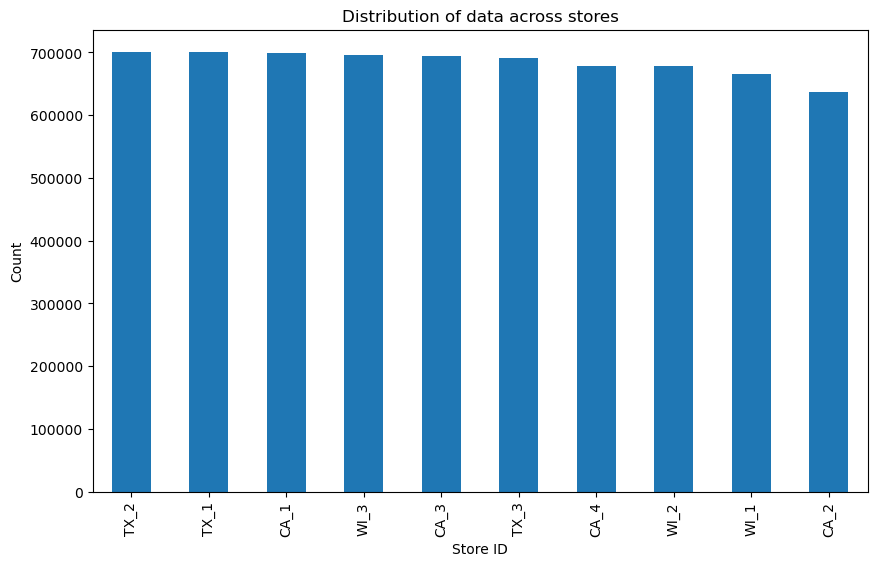

In [23]:
# plotting the distribution of data among 10 stores
sell_prices['store_id'].value_counts().plot(kind='bar', figsize=(10, 6))
plot.title('Distribution of data across stores')
plot.xlabel('Store ID')
plot.ylabel('Count')
plot.show()

In [24]:
average_items_sell_price = sell_prices.groupby('item_id')['sell_price'].mean()
print(f'The item having the highest average sale price is: {average_items_sell_price.idxmax()}, with an average sale price being {average_items_sell_price.max():.2f}')

The item having the highest average sale price is: HOUSEHOLD_1_060, with an average sale price being 29.94


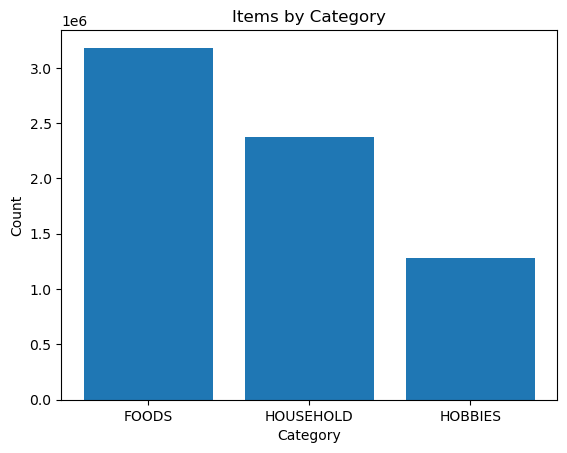

In [25]:
sell_prices['category'] = sell_prices['item_id'].apply(lambda x: x.split('_')[0])
count_of_items_per_category = sell_prices['category'].value_counts()
plot.bar(count_of_items_per_category .index, count_of_items_per_category .values)
plot.xlabel('Category')
plot.ylabel('Count')
plot.title('Items by Category')
plot.show()

In [26]:
sell_prices['category'] = sell_prices['item_id'].apply(lambda x: x.split('_')[0])
count_of_category = sell_prices.groupby('category')['item_id'].nunique()
plot.pie(count_of_category, labels=count_of_category.index, autopct='%1.1f%%')
plot.title('Distribution of Items Across Categories')
plot.axis('equal')
plot.show()

So from above we can see that more items which are for selling are from food category.
And we can see that there are three categories namely foods, household and hobbies.

In [27]:
# Finding the item with the highest average sell price per store
max_of_means = {}
unique_store_ids = list(set(sell_prices['store_id']))

store_item_means = sell_prices.groupby(['store_id', 'item_id'])['sell_price'].mean()
for store_id in unique_store_ids:
    store_items = list(set(sell_prices.loc[sell_prices['store_id'] == store_id]['item_id']))
    max_mean = 0
    for item_id in store_items:
        item_mean = store_item_means.loc[(store_id, item_id)]
        if item_mean > max_mean:
            max_mean = item_mean
            max_item = item_id
    max_of_means[(store_id, max_item)] = max_mean


for store_id, item_id in max_of_means.keys():
    max_mean = store_item_means.loc[(store_id, item_id)]
    print(f'Store {store_id}: Item {item_id} Average sell price = {max_mean:.2f}')

Store WI_3: Item HOBBIES_1_361 Average sell price = 30.50
Store CA_1: Item HOBBIES_1_060 Average sell price = 30.50
Store WI_2: Item HOBBIES_1_225 Average sell price = 30.51
Store CA_4: Item HOBBIES_1_060 Average sell price = 30.50
Store CA_3: Item HOBBIES_1_361 Average sell price = 30.49
Store TX_2: Item HOUSEHOLD_1_060 Average sell price = 29.97
Store CA_2: Item HOBBIES_1_361 Average sell price = 30.50
Store TX_3: Item HOUSEHOLD_1_060 Average sell price = 29.97
Store WI_1: Item HOBBIES_1_225 Average sell price = 30.49
Store TX_1: Item HOUSEHOLD_1_060 Average sell price = 29.87


Most of the items with the highest average sell price falls under the ategory of HOBBIES 

   store_id   category  item_id
0      CA_1      FOODS   329666
1      CA_1    HOBBIES   129629
2      CA_1  HOUSEHOLD   239117
3      CA_2      FOODS   270700
4      CA_2    HOBBIES   129211
5      CA_2  HOUSEHOLD   237484
6      CA_3      FOODS   329351
7      CA_3    HOBBIES   129163
8      CA_3  HOUSEHOLD   235476
9      CA_4      FOODS   323716
10     CA_4    HOBBIES   121591
11     CA_4  HOUSEHOLD   233718
12     TX_1      FOODS   331671
13     TX_1    HOBBIES   128894
14     TX_1  HOUSEHOLD   239231
15     TX_2      FOODS   331980
16     TX_2    HOBBIES   129508
17     TX_2  HOUSEHOLD   239726
18     TX_3      FOODS   324309
19     TX_3    HOBBIES   128583
20     TX_3  HOUSEHOLD   238220
21     WI_1      FOODS   298717
22     WI_1    HOBBIES   129255
23     WI_1  HOUSEHOLD   237940
24     WI_2      FOODS   313113
25     WI_2    HOBBIES   128647
26     WI_2  HOUSEHOLD   236411
27     WI_3      FOODS   328566
28     WI_3    HOBBIES   129424
29     WI_3  HOUSEHOLD   238104


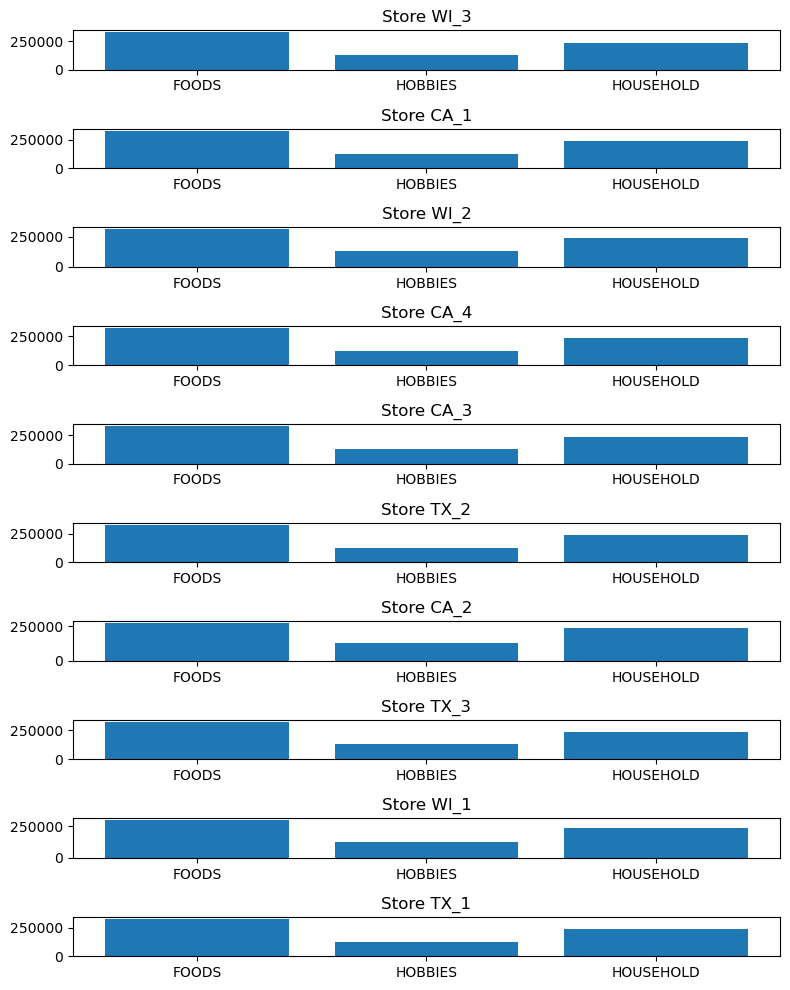

In [28]:
# plotting distribution of categories in each store
category_distribution = sell_prices.groupby(['store_id', 'category'])['item_id'].count().reset_index()
print(category_distribution)

fig, axes = plot.subplots(nrows=len(unique_store_ids), figsize=(8, 10))

for i, store_id in enumerate(unique_store_ids):
    store_data = category_distribution.loc[category_distribution['store_id'] == store_id]
    ax = axes[i]
    ax.bar(store_data['category'], store_data['item_id'])
    ax.set_title(f'Store {store_id}')

fig.tight_layout()
plot.show()

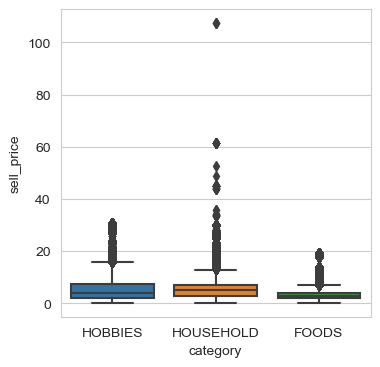

In [29]:
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plot.figure(figsize=(4,4))
sns.boxplot(x=sell_prices['category'], y=sell_prices['sell_price'])
plot.show()

From the box plot, we can conclude that the sell price for most of the items are below 10. We have some outliers that in all 3 categories for which price range varied largely from most of other items in the same category. The item with highest price is 100usd which is an HOUSEHOLD item. The sell price range for the items under FOODS category is less when compared to other two categories. The distribution of this data is not normal.

**Understanding about sell_prices data**

About Data and Data types

The sell_prices dataset contains historical sales prices for Walmart products. 

It is divided into the following columns:

1.   store_id: an identifier for a store where the product is sold
2.   item_id: an identifier for a product
3.   wm_year_week: a string representing the sale's year and week. (e.g. "2011-01" represents the first week of 2011)
4.   sell_price: the cost of the product during that week.

Findings from Data


1.   This dataset includes sales information of items sold in 4 different stores of california('CA_1', 'CA_2', 'CA_3', 'CA_4') and 3 different stores in Texas('TX_1', 'TX_2', 'TX_3') and 3 different stores in Wisconsin('WI_1', 'WI_2', 'WI_3'). In total 10 different stores.
2.   There are three different categories foods, household and hobbies, and there are more number of items for sale from foods category followed by household and hobbies.
3.   By understanding the data, it is found out that the item having the highest average sale price is HOUSEHOLD_1_060, with an average sale price being 29.94.
4.   After finding the items with the highest average sell price per store, it can be seen that the items related to hobbies are expensive in stores of California('CA_1','CA_2','CA_3' and 'CA_4') and also in Washington('WI_1','WI_2' and WI_3) and items related to household are expensive in stores of Texas('TX_1', 'TX_2', 'TX_3').
5.   It can seen that there are many price variations in the items belonging to foods and household, there are less price variation for items related to hobbies.




**EDA on sales_train_evaluation**

In [30]:
#checking missing values in sales_train_evaluation
sales_train_validation.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [31]:
# Select only the columns representing the daily sales (d_1 to d_1913)
daily_sales = sales_train_validation.loc[:, 'd_1':'d_1913']

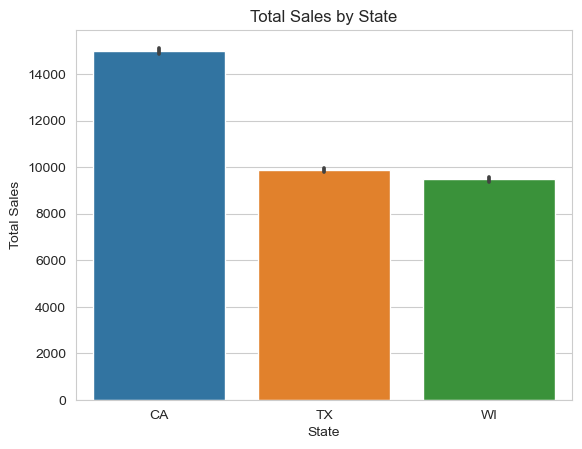

In [32]:
# Add up the daily sales for each state
sales_by_state = sales_train_validation.groupby('state_id')[daily_sales.columns].sum().reset_index()

# Melt the sales data to a long format
melted_sales = pd.melt(sales_by_state, id_vars=['state_id'], var_name='day', value_name='sales')

# Plot the barplot for total sales by state
sns.barplot(x='state_id', y='sales', data=melted_sales)
plot.xlabel('State')
plot.ylabel('Total Sales')
plot.title('Total Sales by State')
plot.show()

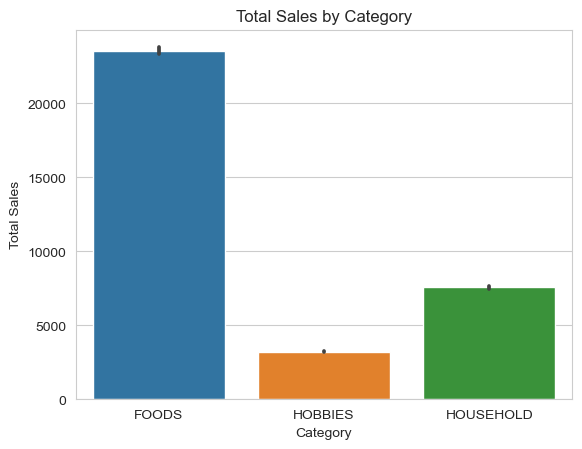

In [33]:
# Add up the daily sales for each category
sales_by_category = sales_train_validation.groupby('cat_id')[daily_sales.columns].sum().reset_index()

# Melt the sales data to a long format
melted_sales = pd.melt(sales_by_category, id_vars=['cat_id'], var_name='day', value_name='sales')

# Plot the barplot for total sales by category
sns.barplot(x='cat_id', y='sales', data=melted_sales)
plot.xlabel('Category')
plot.ylabel('Total Sales')
plot.title('Total Sales by Category')
plot.show()


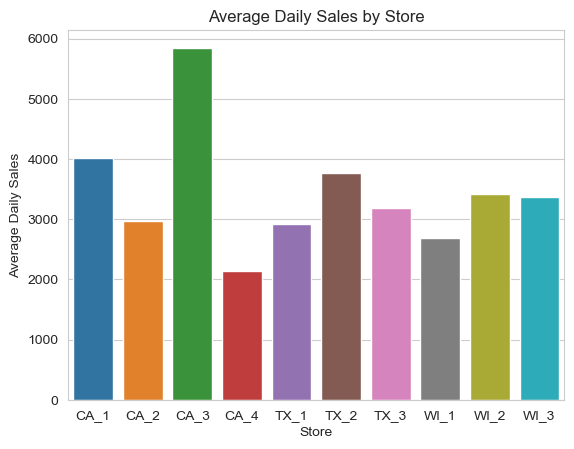

In [34]:
# Add up the daily sales for each store and divide by the number of items
sales_by_store = sales_train_validation.groupby('store_id')[daily_sales.columns].sum().mean(axis=1).reset_index(name='sales')

# Plot the barplot for average daily sales by store
sns.barplot(x='store_id', y='sales', data=sales_by_store)
plot.xlabel('Store')
plot.ylabel('Average Daily Sales')
plot.title('Average Daily Sales by Store')
plot.show()


In [35]:
plot.figure(figsize=(30,15))
store_sales = sales_train_validation.groupby('state_id').sum().reset_index().melt(id_vars='state_id', var_name='day', value_name='sales')
sns.lineplot(x='day', y='sales', hue='state_id', data=store_sales)
plot.xlabel('Day')
plot.ylabel('Total Sold Items')
plot.title('Total Sold Items by State')
plot.show()

In [36]:
plot.figure(figsize=(30,15))
store_sales = sales_train_validation.groupby('store_id').sum().reset_index().melt(id_vars='store_id', var_name='day', value_name='sales')
sns.lineplot(x='day', y='sales', hue='store_id', data=store_sales)
plot.xlabel('Day')
plot.ylabel('Total Sold Items')
plot.title('Total Sold Items by Store')
plot.show()

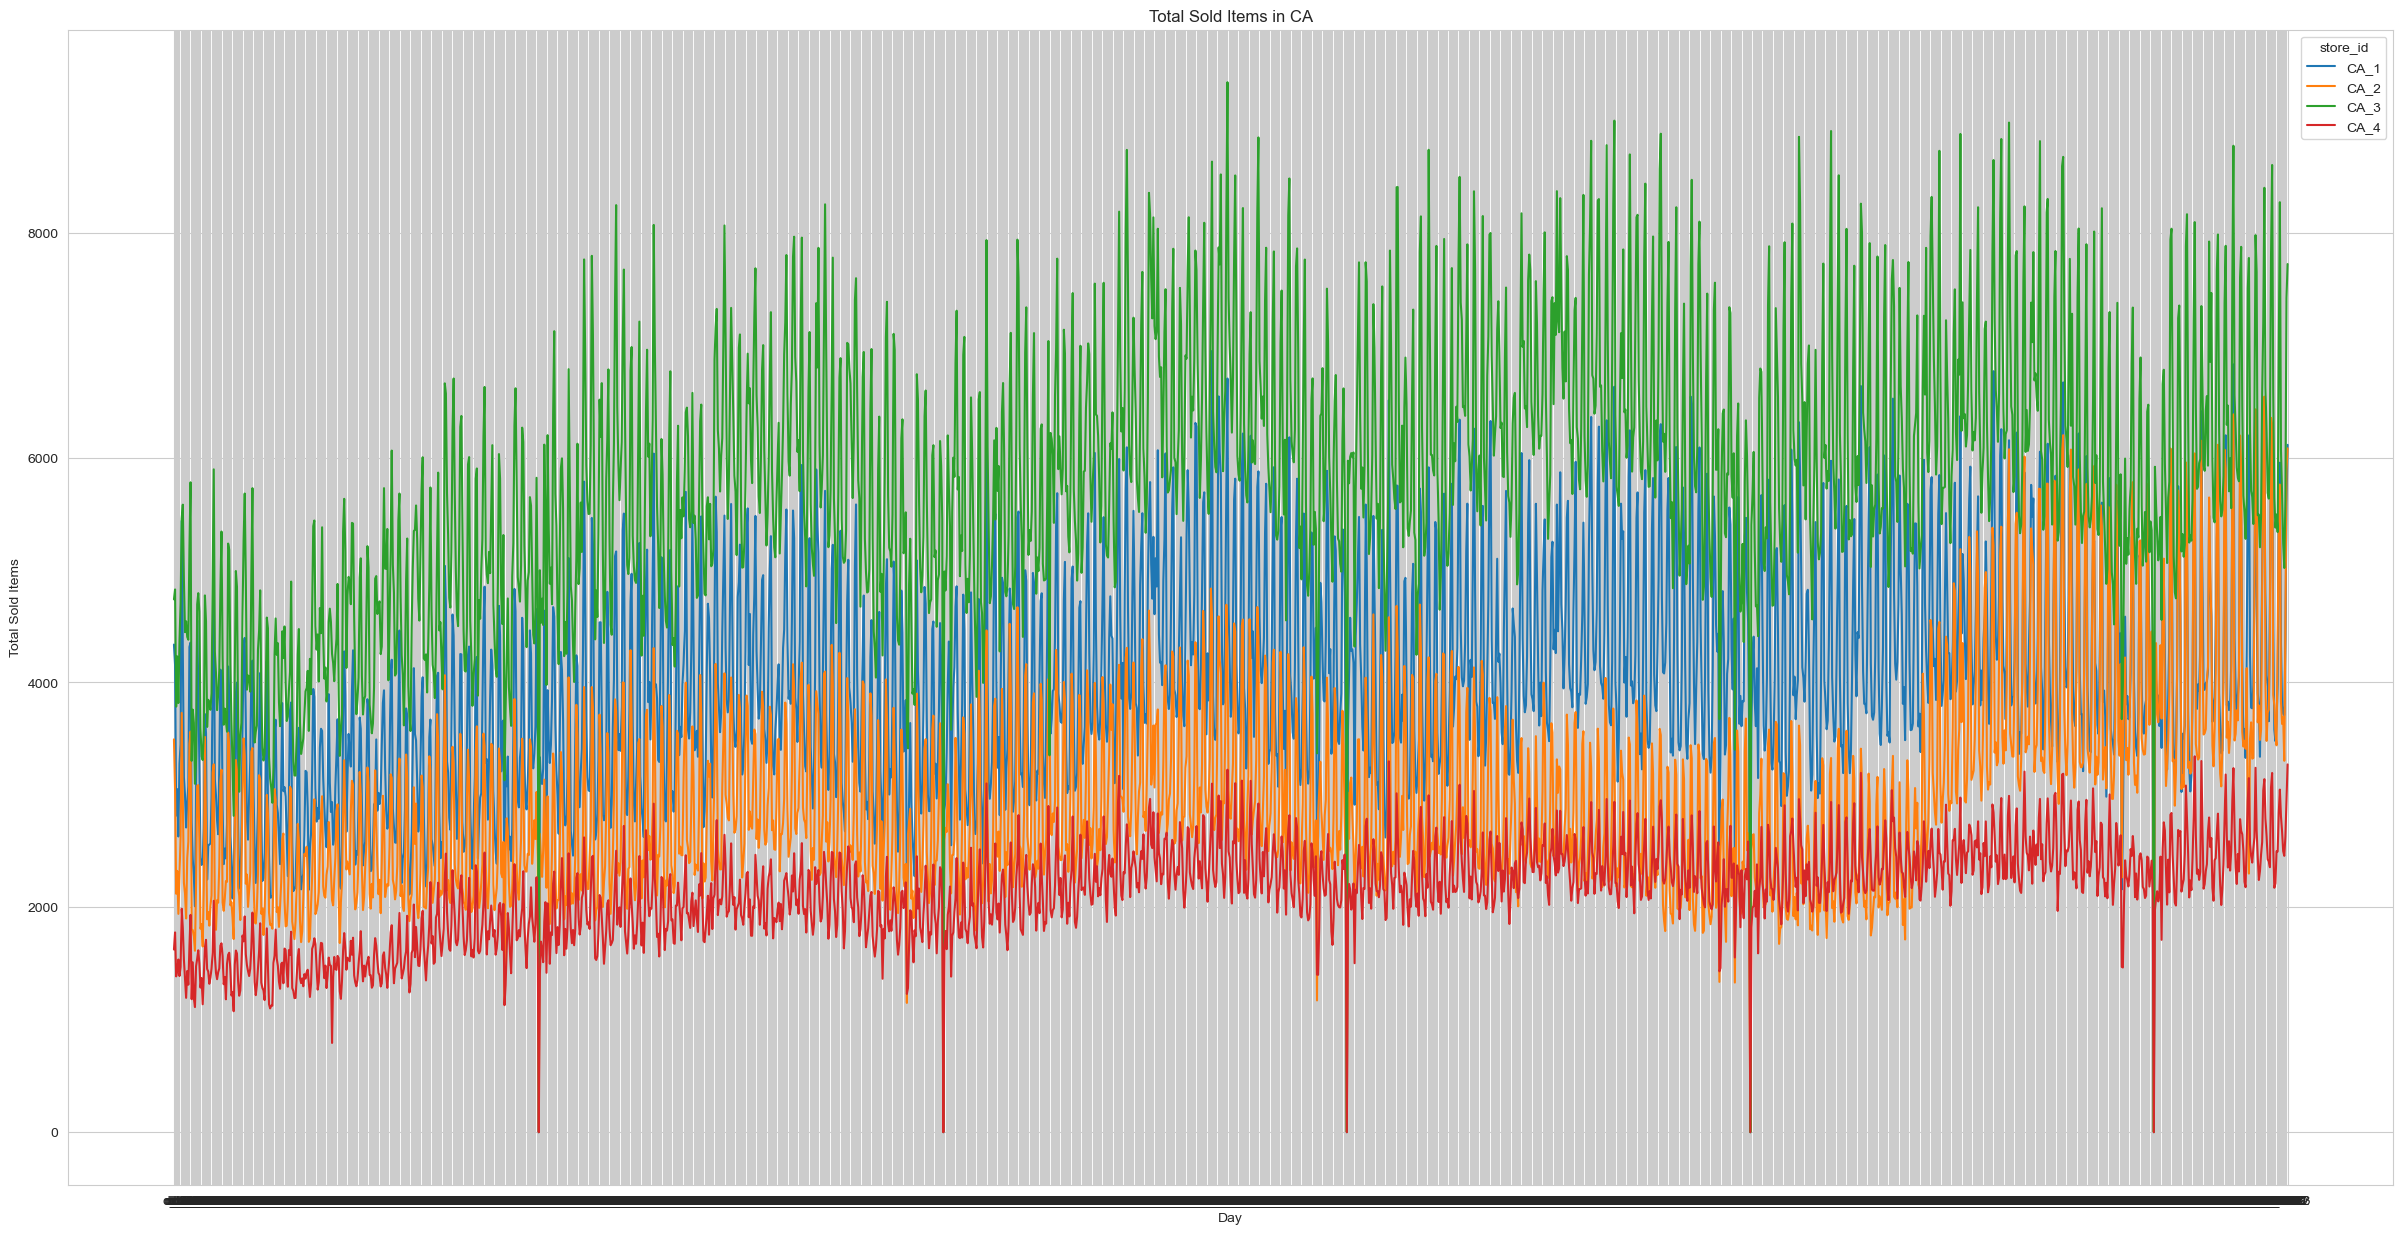

In [37]:
ca_sales = sales_train_validation.loc[sales_train_validation['state_id'] == 'CA']

plot.figure(figsize=(30,15))
store_sales_ca = ca_sales.groupby('store_id').sum().reset_index().melt(id_vars='store_id', var_name='day', value_name='sales')
sns.lineplot(x='day', y='sales', hue='store_id', data=store_sales_ca)
plot.xlabel('Day')
plot.ylabel('Total Sold Items')
plot.title('Total Sold Items in CA')
plot.show()

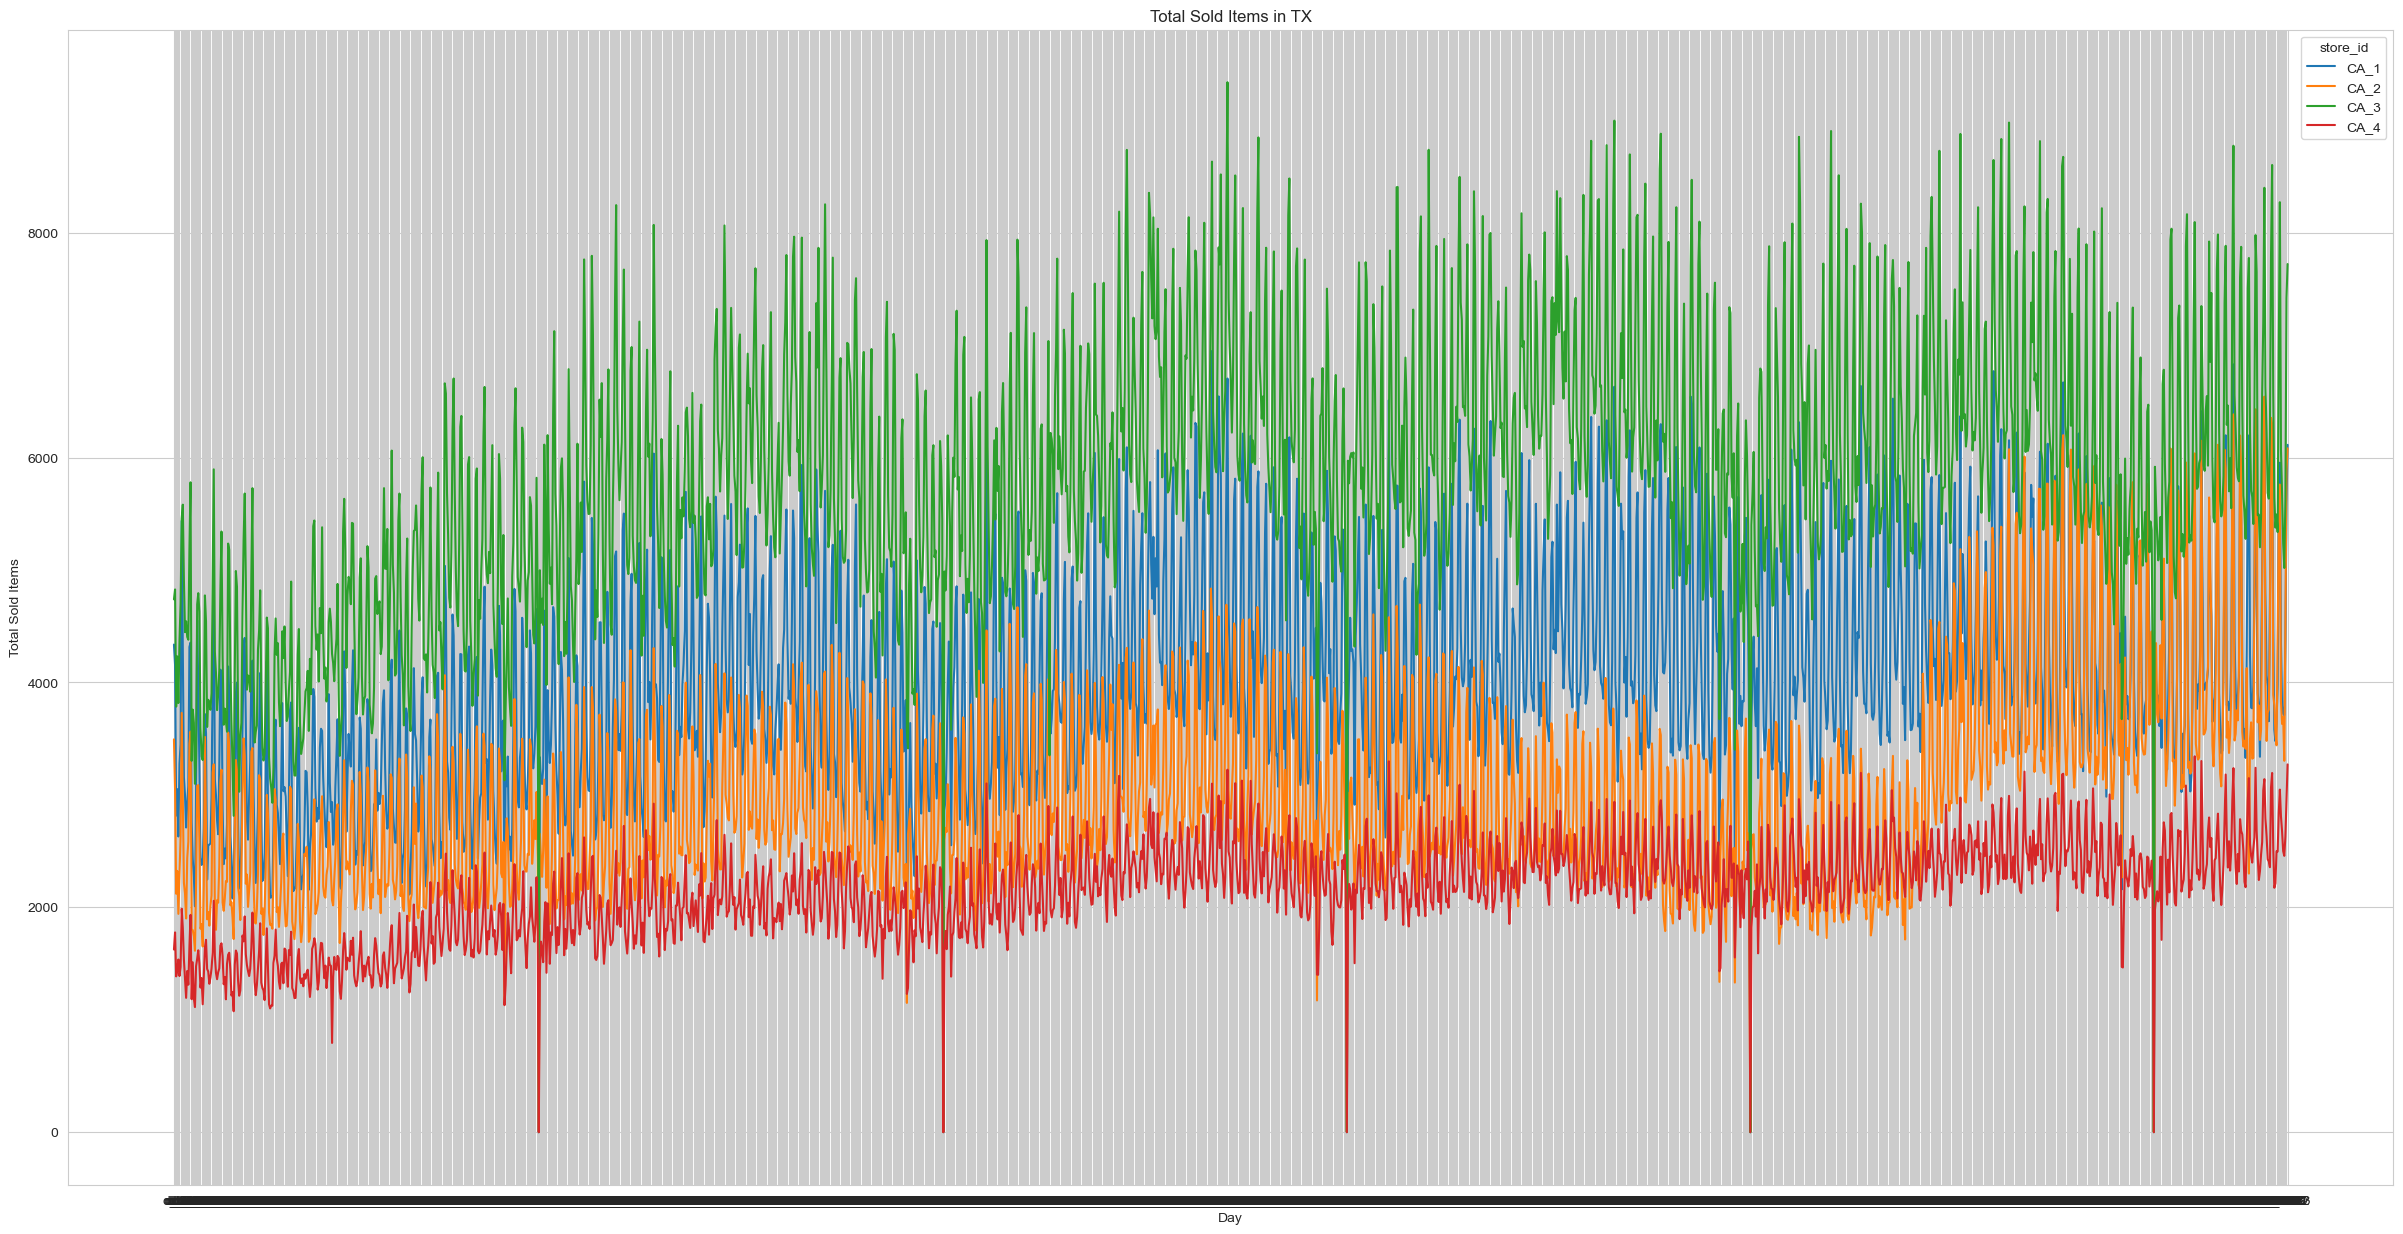

In [38]:
tx_sales = sales_train_validation.loc[sales_train_validation['state_id'] == 'TX']

plot.figure(figsize=(30,15))
store_sales_tx = tx_sales.groupby('store_id').sum().reset_index().melt(id_vars='store_id', var_name='day', value_name='sales')
sns.lineplot(x='day', y='sales', hue='store_id', data=store_sales_ca)
plot.xlabel('Day')
plot.ylabel('Total Sold Items')
plot.title('Total Sold Items in TX')
plot.show()

In [39]:
wi_sales = sales_train_validation.loc[sales_train_validation['state_id'] == 'WI']

plot.figure(figsize=(30,15))
store_sales_wi = wi_sales.groupby('store_id').sum().reset_index().melt(id_vars='store_id', var_name='day', value_name='sales')
sns.lineplot(x='day', y='sales', hue='store_id', data=store_sales_wi)
plot.xlabel('Day')
plot.ylabel('Total Sold Items')
plot.title('Total Sold Items in WI')
plot.show()

In [40]:
# Group the data by store and item
sales_by_store_item = sales_train_validation.groupby(['store_id', 'item_id']).sum()

# Print the sales for each store and item
print(sales_by_store_item)

                          d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  \
store_id item_id                                                              
CA_1     FOODS_1_001        3    0    0    1    4    2    0    2    0     0   
         FOODS_1_002        0    1    0    1    1    1    0    0    0     0   
         FOODS_1_003        0    0    0    0    1    3    1    1    1     0   
         FOODS_1_004        0    0    0    0    0    0    0    0    0     0   
         FOODS_1_005        3    9    3    3    0    2    1    2    1     7   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
WI_3     HOUSEHOLD_2_512    0    2    0    0    0    0    0    3    0     0   
         HOUSEHOLD_2_513    0    0    0    0    0    0    0    0    0     0   
         HOUSEHOLD_2_514    0    1    1    0    0    0    0    2    0     0   
         HOUSEHOLD_2_515    0    0    0    0    0    0    0    0    0     0   
         HOUSEHOLD_2_516    0    1    0    1    0   

**Understanding about the sales_train_validation data**

About Data and Data types

The sales_train_validation contains the daily unit sales data per product and store.

The columns present in the dataset are:

1.id: an unique identifier.

2.item_id: an identifier for a product.

3.dept_id: an identifier for a department. 

4.cat_id: an identifier for a category. 

5.store_id: an identifier for a store where the product is sold.

6.d_1 to d_1913: is an identifier for a product sold in each day.

Findings from the data:

1.We have more sales in California when compared to Texas and Wisconsin.

2.There are three different categories foods, household and hobbies, and there are more number of items for sale from foods category followed by household and hobbies.

3.When compared with the different stores in different states, the sales in CA_3 has the most sales.

4.In California the sales during the starting period around 10,000 and then gradually at the end of the period it increased to aprox 25,000. Texas and Wisconsin sales are almost same at the end of the period but at the starting point texas has more sales compared to Wisconin.

5.In California state the highest sales occured in CA_3 store and lowest were in CA_4 store.

6.In Texas state, all stores have the approx same sales towards at end of the period. While at the starting the TX_2 store has the highest sales.

7.In Wisconsin, the store WI_3 has the highest sales at the start but it was gradually decreased at the end of the period whereas it is quite opposite in the sales of the store WI_2.



In [41]:
train_sales_prices_df = sales_train_validation.merge(sell_prices, how='inner', 
                                            left_index=True, right_index=True, 
                                            validate="1:1")

In [42]:
train_sales_prices_df.head()

id      item_id_x    dept_id   cat_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   

  store_id_x state_id  d_1  d_2  d_3  d_4  ...  d_1909  d_1910  d_1911  \
0       CA_1       CA    0    0    0    0  ...       1       3       0   
1       CA_1       CA    0    0    0    0  ...       1       0       0   
2       CA_1       CA    0    0    0    0  ...       1       0       1   
3       CA_1       CA    0    0    0    0  ...       0       1       3   
4       CA_1       CA    0    0    0    0  ...       1       2       2   

   d_1912  d_1913  store_id_y      item_id_y  wm_yr_wk  sell_price  category  
0       1       1        CA_1  HOBBIES_1_001     11325        9.58   HOBBIES  
1       0       0        CA_1  HOBBIES_1_001     11326        9.58   HOBBIES  
2       1       1        CA_1  HOBBIES_1_001     11327        8.26   HOBBIES  
3       7       2        CA_1  HOBBIES_1_001     11328        8.26   HOBBIES  
4       2       4        CA_1  HOBBIES_1_001     11329        8.26   HOBBIES  

[5 rows x 1924 columns]

In [43]:
##Finding total revenue
revenue_df = train_sales_prices_df.groupby(
    ['cat_id', 'state_id',
     'store_id_x'])['sell_price'].sum().reset_index(name='total_revenue')
revenue_df = revenue_df.sort_values(by='total_revenue', ascending=False)

In [44]:
revenue_df.head()

cat_id state_id store_id_x  total_revenue
27  HOUSEHOLD       WI       WI_1       11359.90
1       FOODS       CA       CA_2       11204.29
24  HOUSEHOLD       TX       TX_1       11064.48
5       FOODS       TX       TX_2       10994.93
8       FOODS       WI       WI_2       10183.96

<AxesSubplot:xlabel='state_id', ylabel='total_revenue'>

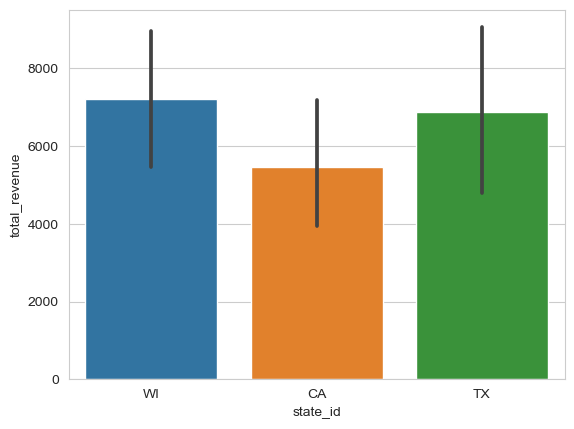

In [45]:
## Total revenue generated by each state
sns.barplot(x = 'state_id', y='total_revenue', data=revenue_df)

The total revenue generated by Wisconsin is highest and followed by Texas and California.

<AxesSubplot:xlabel='cat_id', ylabel='total_revenue'>

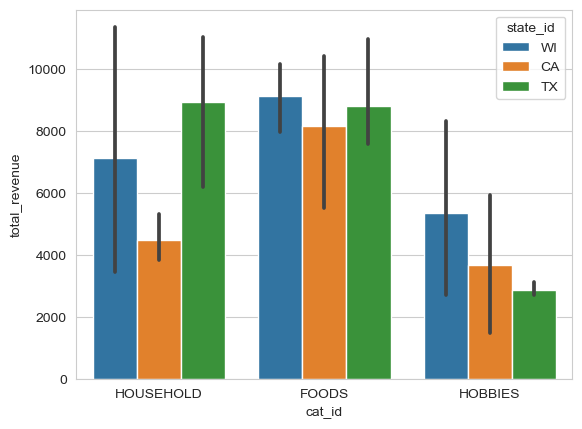

In [46]:
## Revenue generated by each category in each state
sns.barplot(x = 'cat_id', y='total_revenue', hue='state_id', data=revenue_df)

The total revenue generated by the category food sold in Wisconsin is highest among all the three categories and in states and hobbies is the  least among all the states.

In [47]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c]
train_sales_cal_df = sales_train_validation.set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')
train_sales_cal_df['total_sales'] = train_sales_cal_df.sum(axis=1)
train_sales_cal_df = train_sales_cal_df.reset_index()

In [48]:
## Distribution of total sales among all the stores for each day
train_sales_cal_df = sales_train_validation.groupby(['store_id'])[d_cols].sum()\
                                                .T.merge(calendar.set_index('d')['date'], 
                                                        left_index=True, right_index=True,
                                                        validate="1:1").set_index('date')
train_sales_cal_df.head(5)

CA_1  CA_2  CA_3  CA_4  TX_1  TX_2  TX_3  WI_1  WI_2  WI_3
date                                                                  
2011-01-29  4337  3494  4739  1625  2556  3852  3030  2704  2256  4038
2011-01-30  4155  3046  4827  1777  2687  3937  3006  2194  1922  4198
2011-01-31  2816  2121  3785  1386  1822  2731  2225  1562  2018  3317
2011-02-01  3051  2324  4232  1440  2258  2954  2169  1251  2522  3211
2011-02-02  2630  1942  3817  1536  1694  2492  1726     2  1175  2132

In [54]:
train_sales_cal_day_df = sales_train_validation.groupby(['id'])[d_cols].sum()\
                                                .T.merge(calendar.set_index('d')['date'], 
                                                        left_index=True, right_index=True,
                                                        validate="1:1").set_index('date')

### MODELS IMPLEMENTATION

## SARIMAX

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]
aic_best = np.inf
pdq_best = None
seasonal_pdq_best = None
for itr in pdq:
    for itr1 in seasonal_pdq:
        try:
            model = SARIMAX(train_sales_cal_day_df.iloc[:,0], order=itr, seasonal_order=itr1, 
                          enforce_stationarity=False, enforce_invertibility=False)
            res = model.fit()
            if res.aic < aic_best:
                aic_best = res.aic
                pdq_best = itr
                seasonal_pdq_best = itr1
        except:
            continue
print(f'Best parameters of SARIMA model: {pdq_best} x {seasonal_pdq_best}')


final_results = pd.DataFrame()
for iterate in range(train_sales_cal_day_df.shape[1]):
    model = SARIMAX(train_sales_cal_day_df.iloc[:,iterate], order=pdq_best, seasonal_order=seasonal_pdq_best, 
                  enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit()
    prediction = res.get_forecast(steps=28)
    final_results[train_sales_cal_day_df.columns[iterate]] = prediction.predicted_mean


last_date = train_sales_cal_day_df.index[-1]
forecasted_date = pd.date_range(last_date, periods=28, freq='D')[1:]
final_results.index = forecasted_date


print(final_results)

C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

Best parameters of SARIMA model: (1, 0, 1) x (0, 1, 1, 7)


C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

ValueError: Length mismatch: Expected axis has 28 elements, new values have 27 elements

In [66]:
test_sales_cal_day_df = sales_train_evaluation.groupby(['id'])[d_cols].sum()\
                                                .T.merge(calendar.set_index('d')['date'], 
                                                        left_index=True, right_index=True, validate="1:1")

In [67]:
testing_df = test_sales_cal_day_df.tail(28)
testing_df = testing_df.drop('date', axis=1)

In [113]:
for col in final_results.columns:
    if col != 'ds':
        final_results[col] = final_results[col].apply(np.ceil)
        final_results[col] = final_results[col].abs()
        final_results[col] = final_results[col].astype('int')
final_results.head(5)

FOODS_1_001_CA_1_validation  FOODS_1_001_CA_2_validation  \
2016-04-25                            1                            2   
2016-04-26                            1                            2   
2016-04-27                            1                            2   
2016-04-28                            1                            2   
2016-04-29                            2                            2   

            FOODS_1_001_CA_3_validation  FOODS_1_001_CA_4_validation  \
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            2                            1   

            FOODS_1_001_TX_1_validation  FOODS_1_001_TX_2_validation  \
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

            FOODS_1_001_TX_3_validation  FOODS_1_001_WI_1_validation  \
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

            FOODS_1_001_WI_2_validation  FOODS_1_001_WI_3_validation  ...  \
2016-04-25                            1                            0  ...   
2016-04-26                            1                            1  ...   
2016-04-27                            1                            1  ...   
2016-04-28                            1                            1  ...   
2016-04-29                            1                            1  ...   

            FOODS_1_051_CA_1_validation  FOODS_1_051_CA_2_validation  \
2016-04-25                            2                            2   
2016-04-26                            1                            2   
2016-04-27                            1                            2   
2016-04-28                            1                            1   
2016-04-29                            2                            2   

            FOODS_1_051_CA_3_validation  FOODS_1_051_CA_4_validation  \
2016-04-25                            2                            2   
2016-04-26                            3                            2   
2016-04-27                            3                            2   
2016-04-28                            3                            2   
2016-04-29                            2                            2   

            FOODS_1_051_TX_1_validation  FOODS_1_051_TX_2_validation  \
2016-04-25                            2                            2   
2016-04-26                            1                            2   
2016-04-27                            1                            2   
2016-04-28                            2                            2   
2016-04-29                            2                            2   

            FOODS_1_051_TX_3_validation  FOODS_1_051_WI_1_validation  \
2016-04-25                            1                            1   
2016-04-26                            2                            1   
2016-04-27                            2                            2   
2016-04-28                            2                            2   
2016-04-29                            2                            1   

            FOODS_1_051_WI_2_validation  FOODS_1_051_WI_3_validation  
2016-04-25    

In [114]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(testing_df, final_results, squared=False)

print("Total RMSE of SARIMAX:", rmse)

Total RMSE of SARIMAX: 1.769427337470288


## ARIMA

In [78]:
import statsmodels.api as sm
predictions_df = pd.DataFrame()

for item_id in train_sales_cal_day_df.columns:
    item_sales = train_sales_cal_day_df[item_id]
    arima_model = sm.tsa.ARIMA(item_sales, order=(1, 1, 1)).fit()
    item_predictions = arima_model.predict(start=len(item_sales), end=len(item_sales) + 27)
    predictions_df[item_id] = item_predictions

C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [115]:
for col in predictions_df.columns:
    if col != 'ds':
        predictions_df[col] = predictions_df[col].apply(np.ceil)
        predictions_df[col] = predictions_df[col].abs()
        predictions_df[col] = predictions_df[col].astype('int')
predictions_df.head(5)

FOODS_1_001_CA_1_validation  FOODS_1_001_CA_2_validation  \
2016-04-25                            2                            2   
2016-04-26                            2                            2   
2016-04-27                            2                            2   
2016-04-28                            2                            2   
2016-04-29                            2                            2   

            FOODS_1_001_CA_3_validation  FOODS_1_001_CA_4_validation  \
2016-04-25                            2                            1   
2016-04-26                            2                            1   
2016-04-27                            2                            1   
2016-04-28                            2                            1   
2016-04-29                            2                            1   

            FOODS_1_001_TX_1_validation  FOODS_1_001_TX_2_validation  \
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

            FOODS_1_001_TX_3_validation  FOODS_1_001_WI_1_validation  \
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

            FOODS_1_001_WI_2_validation  FOODS_1_001_WI_3_validation  ...  \
2016-04-25                            1                            1  ...   
2016-04-26                            1                            1  ...   
2016-04-27                            1                            1  ...   
2016-04-28                            1                            1  ...   
2016-04-29                            1                            1  ...   

            FOODS_1_051_CA_1_validation  FOODS_1_051_CA_2_validation  \
2016-04-25                            1                            2   
2016-04-26                            1                            2   
2016-04-27                            1                            2   
2016-04-28                            1                            2   
2016-04-29                            1                            2   

            FOODS_1_051_CA_3_validation  FOODS_1_051_CA_4_validation  \
2016-04-25                            3                            2   
2016-04-26                            3                            2   
2016-04-27                            3                            2   
2016-04-28                            3                            2   
2016-04-29                            3                            2   

            FOODS_1_051_TX_1_validation  FOODS_1_051_TX_2_validation  \
2016-04-25                            2                            2   
2016-04-26                            2                            2   
2016-04-27                            2                            2   
2016-04-28                            2                            2   
2016-04-29                            2                            2   

            FOODS_1_051_TX_3_validation  FOODS_1_051_WI_1_validation  \
2016-04-25                            2                            2   
2016-04-26                            2                            2   
2016-04-27                            2                            2   
2016-04-28                            2                            2   
2016-04-29                            2                            2   

            FOODS_1_051_WI_2_validation  FOODS_1_051_WI_3_validation  
2016-04-25    

In [116]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(testing_df, predictions_df, squared=False)

print("Total RMSE of ARIMA:", rmse)

Total RMSE of ARIMA: 1.6992314983921402


## PROPHET

In [83]:
from prophet import Prophet

In [99]:
train_sales_cal_day_df = sales_train_validation.groupby(['id'])[d_cols].sum()\
                                                .T.merge(calendar.set_index('d')['date'], 
                                                        left_index=True, right_index=True,
                                                        validate="1:1")

In [100]:
df = train_sales_cal_day_df

In [101]:
colmns = df.columns.tolist()
colmns = [colmns[-1]] + colmns[:-1]
df = df[colmns]

In [105]:
df_prophet_full = df.melt(id_vars='date', var_name='item_store', value_name='sales').rename(columns={'date': 'ds'})
df_prophet_full['y'] = df_prophet_full['sales']
df_prophet_full.tail(5)

ds                   item_store  sales  y
954582  2016-04-20  FOODS_1_051_WI_2_validation      1  1
954583  2016-04-21  FOODS_1_051_WI_2_validation      2  2
954584  2016-04-22  FOODS_1_051_WI_2_validation      3  3
954585  2016-04-23  FOODS_1_051_WI_2_validation      3  3
954586  2016-04-24  FOODS_1_051_WI_2_validation      1  1

In [107]:
df_prophet = df_prophet_full
models = {}
count = 0
for item_store in df_prophet['item_store'].unique():
    item_store_df = df_prophet[df_prophet['item_store'] == item_store].dropna()
    model = Prophet()
    model.add_seasonality(name='yearly', period=365, fourier_order=10)
    model.add_seasonality(name='weekly', period=7, fourier_order=20)
    model.add_seasonality(name='daily', period=1, fourier_order=15)
    model.fit(item_store_df)
    models[item_store] = model
    count = count +1

future = pd.DataFrame({'ds': pd.date_range(start='2016-04-25', periods=28)})
forecasts = {}
for item_store, model in models.items():
    item_store_forecast = model.predict(future)
    item_store_forecast['item_store'] = item_store
    forecasts[item_store] = item_store_forecast

forecast_df = pd.concat(forecasts.values())

forecast_df = forecast_df.pivot(index='ds', columns='item_store', values='yhat').fillna(0)

18:37:00 - cmdstanpy - INFO - Chain [1] start processing
18:37:00 - cmdstanpy - INFO - Chain [1] done processing
18:37:02 - cmdstanpy - INFO - Chain [1] start processing
18:37:02 - cmdstanpy - INFO - Chain [1] done processing
18:37:03 - cmdstanpy - INFO - Chain [1] start processing
18:37:04 - cmdstanpy - INFO - Chain [1] done processing
18:37:05 - cmdstanpy - INFO - Chain [1] start processing
18:37:05 - cmdstanpy - INFO - Chain [1] done processing
18:37:06 - cmdstanpy - INFO - Chain [1] start processing
18:37:07 - cmdstanpy - INFO - Chain [1] done processing
18:37:08 - cmdstanpy - INFO - Chain [1] start processing
18:37:09 - cmdstanpy - INFO - Chain [1] done processing
18:37:10 - cmdstanpy - INFO - Chain [1] start processing
18:37:11 - cmdstanpy - INFO - Chain [1] done processing
18:37:12 - cmdstanpy - INFO - Chain [1] start processing
18:37:12 - cmdstanpy - INFO - Chain [1] done processing
18:37:14 - cmdstanpy - INFO - Chain [1] start processing
18:37:14 - cmdstanpy - INFO - Chain [1]

In [117]:
for col in forecast_df.columns:
    if col != 'ds':
        forecast_df[col] = forecast_df[col].apply(np.ceil)
        forecast_df[col] = forecast_df[col].abs()
        forecast_df[col] = forecast_df[col].astype('int')
forecast_df.head(5)

item_store  FOODS_1_001_CA_1_validation  FOODS_1_001_CA_2_validation  \
ds                                                                     
2016-04-25                            1                            1   
2016-04-26                            1                            2   
2016-04-27                            1                            1   
2016-04-28                            1                            2   
2016-04-29                            1                            2   

item_store  FOODS_1_001_CA_3_validation  FOODS_1_001_CA_4_validation  \
ds                                                                     
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            2                            1   

item_store  FOODS_1_001_TX_1_validation  FOODS_1_001_TX_2_validation  \
ds                                                                     
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

item_store  FOODS_1_001_TX_3_validation  FOODS_1_001_WI_1_validation  \
ds                                                                     
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

item_store  FOODS_1_001_WI_2_validation  FOODS_1_001_WI_3_validation  ...  \
ds                                                                    ...   
2016-04-25                            1                            1  ...   
2016-04-26                            1                            1  ...   
2016-04-27                            1                            1  ...   
2016-04-28                            1                            1  ...   
2016-04-29                            1                            1  ...   

item_store  FOODS_1_050_WI_3_validation  FOODS_1_051_CA_1_validation  \
ds                                                                     
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1   
2016-04-29                            1                            1   

item_store  FOODS_1_051_CA_2_validation  FOODS_1_051_CA_3_validation  \
ds                                                                     
2016-04-25                            2                            2   
2016-04-26                            2                            3   
2016-04-27                            2                            3   
2016-04-28                            2                            3   
2016-04-29                            2                            3   

item_store  FOODS_1_051_CA_4_validation  FOODS_1_051_TX_1_validation  \
ds                                                                     
2016-04-25                            1                            1   
2016-04-26                            1                            1   
2016-04-27                            1                            1   
2016-04-28                            1                            1  

In [119]:
forecast_df = forecast_df.drop(forecast_df.columns[0], axis=1)

In [121]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(testing_df, forecast_df, squared=False)

print("Total RMSE of Prophet:", rmse)

Total RMSE of Prophet: 2.063853111133504


## XGBoost

In [124]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [150]:
import multiprocessing
import xgboost as xgb
from multiprocessing import cpu_count

def train_model(train_data, valid_data, features, target, params):
    dtrain = xgb.DMatrix(train_data[features], label=train_data[target])
    dvalid = xgb.DMatrix(valid_data[features], label=valid_data[target])
    model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dvalid, 'valid')],n_jobs=cpu_count(), early_stopping_rounds=50, verbose_eval=10)
    
    return model

df = train


df['updated_date'] = pd.to_datetime(df['ds'])


split_date = '2016-01-01'


train_data = df[df['updated_date'] < split_date]
valid_data = df[df['updated_date'] >= split_date]


features = ['item_store']
target = 'sales'


params = {
    'objective': 'reg:squarederror',
    'max_depth': 8,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}


num_processes = multiprocessing.cpu_count()

dtrain = xgb.DMatrix(train_data[features], label=train_data[target], enable_categorical=True)
dvalid = xgb.DMatrix(valid_data[features], label=valid_data[target], enable_categorical=True)


params = {
    'objective': 'reg:squarederror',
    'max_depth': 8,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'nthread': cpu_count()
}


model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dvalid, 'valid')], early_stopping_rounds=50, verbose_eval=10)


valid_preds = model.predict(dvalid)


rmse = mean_squared_error(valid_data[target], valid_preds, squared=False)
print('RMSE:', rmse)

[0]	valid-rmse:3.27836
[10]	valid-rmse:2.80071
[20]	valid-rmse:2.75822
[30]	valid-rmse:2.75263
[40]	valid-rmse:2.75703
[50]	valid-rmse:2.76028
[60]	valid-rmse:2.76255
[70]	valid-rmse:2.76309
[77]	valid-rmse:2.76378
RMSE: 2.7637794


In [201]:
calendar['event_name_1'].unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [202]:
calendar['event_name_2'].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [203]:
weekends = ['Sunday', 'Saturday']

def weekend(day):
    if (day in weekends):
        return 1
    else:
        return 0
calendar['weekend'] = calendar['weekday'].apply(weekend)

In [204]:
events = ['SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter']

def holiday(event):
    if (event in events):
        return 1
    else:
        return 0
    
calendar['holiday_1'] = calendar['event_name_1'].apply(holiday)
calendar['holiday_2'] = calendar['event_name_2'].apply(holiday)

In [205]:
calendar['holiday'] = calendar[['holiday_1','holiday_2']].max(axis=1)

In [206]:
calendar = calendar.drop(['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'], axis='columns')

In [207]:
calendar = calendar.drop(['weekday', 'wday', 'month', 'year'], axis='columns')

In [208]:
calendar.head(1)

date  wm_yr_wk    d  snap_CA  snap_TX  snap_WI  weekend  holiday_1  \
0  2011-01-29     11101  d_1        0        0        0        1          0   

   holiday_2  holiday  
0          0        0

In [209]:
days = []
for x in range(1851):
    days.append('d_' + str(x+1))

In [210]:
sales_train_evaluation

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
0         CA_1       CA    0    0    0    0  ...       2       4       0   
1         CA_1       CA    0    0    0    0  ...       0       1       2   
2         CA_1       CA    0    0    0    0  ...       1       0       2   
3         CA_1       CA    0    0    0    0  ...       1       1       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       1       0       3   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       1   
30488     WI_3       WI    0    0    0    0  ...       1       1       1   
30489     WI_3       WI    0    0    0    0  ...       1       2       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0           0       0       0       3       3       0       1  
1           1       1       0       0       0       0       0  
2           0       0       0       2       3       0       1  
3           4       0       1       3       0       2       6  
4           2       1       0       0       2       1       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       1       1       0       0       1       1  
30486       0       0       0       1       0       1       0  
30487       2       0       1       0       1       0       2  
30488       4       6       0       1       1       1       0  
30489       5       4       0       2       2       5       1  

[30490 rows x 1947 columns]

In [211]:
sales_train_evaluation = sales_train_evaluation.drop(days, axis='columns')

In [212]:
sales_train_evaluation = sales_train_evaluation.melt(['id','item_id','dept_id','cat_id','store_id','state_id'], var_name='d', value_name='sales')
print(sales_train_evaluation.shape)

(2744100, 8)


In [213]:
sales_train_evaluation = pd.merge(sales_train_evaluation, calendar, how='left', on='d')
sales_train_evaluation.head(1)

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  snap_CA  snap_TX  snap_WI  \
0       CA  d_1852      0  2016-02-23     11604        0        0        0   

   weekend  holiday_1  holiday_2  holiday  
0        0          0          0        0

In [214]:
sales_train_evaluation = pd.merge(sales_train_evaluation, sell_prices, how='left', on=['item_id', 'wm_yr_wk', 'store_id'])

In [215]:
sales_train_evaluation_test = sales_train_evaluation.query('d == "d_1852"')

In [216]:
sales_train_evaluation_test = sales_train_evaluation_test[['id', 'store_id', 'item_id', 'dept_id', 'cat_id', 'state_id', 'd', 'sales', 'sell_price']]

In [217]:
sales_train_evaluation_test['sales'] = sales_train_evaluation_test['d'].apply(lambda x: int(x.replace(x, '0')))

In [218]:
sales_train_evaluation_test_2 = sales_train_evaluation_test

In [219]:
for x in range(28):
    sales_train_evaluation_test = sales_train_evaluation_test.append(sales_train_evaluation_test_2)

In [220]:
sales_train_evaluation_test = sales_train_evaluation_test.reset_index(drop=True)

In [221]:
indexes = sales_train_evaluation_test.index
t = 0
days_l = []
for i in indexes:
    days_l.append('d_' + str(((indexes[t]) // 3049*10) + 1942))
    t = t + 1

In [222]:
sales_train_evaluation_test['d'] = days_l

In [223]:
sales_train_evaluation_test = pd.merge(sales_train_evaluation_test,calendar, how='left', on='d')

In [224]:
sales_train_evaluation_test = pd.merge(sales_train_evaluation_test, sell_prices ,how='left', on=['item_id', 'wm_yr_wk', 'store_id'])

In [225]:
import gc
del sales_train_evaluation_test_2
gc.collect()

202

In [226]:
sales_train_evaluation = pd.get_dummies(data=sales_train_evaluation, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])
sales_train_evaluation_test = pd.get_dummies(data=sales_train_evaluation_test, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])

In [227]:
sales_train_evaluation_test =sales_train_evaluation_test.drop(['sell_price_x', 'snap_CA', 'snap_TX', 'snap_WI'], axis='columns')
sales_train_evaluation_test = sales_train_evaluation_test.rename(columns={'sell_price_y': 'sell_price'})
sales_train_evaluation = sales_train_evaluation.drop(['snap_CA', 'snap_TX', 'snap_WI'], axis='columns')  

In [228]:
from sklearn.model_selection import train_test_split

not_needed_columns = ['id', 'item_id', 'd', 'date', 'wm_yr_wk']
features = [column for column in sales_train_evaluation.columns if column not in not_needed_columns]

target = 'sales'

X = np.array(sales_train_evaluation[features])
y = np.array(sales_train_evaluation[target])

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## LIGHTGBM

In [230]:
import optuna
import lightgbm as lgb

def objective(trial):
    params = {
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42,
    }
    lgb_reg = lgb.LGBMRegressor(**params)
    lgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    y_pred = lgb_reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best_params = study.best_params
best_params

[I 2023-04-26 20:04:47,325] A new study created in memory with name: no-name-46bdcc4f-7d43-4abd-af56-075346838e88
[I 2023-04-26 20:22:29,052] Trial 0 finished with value: 0.9032566935623817 and parameters: {'boosting_type': 'dart', 'num_leaves': 236, 'learning_rate': 0.035421447956896376, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.8577859063660153, 'colsample_bytree': 0.5351675517031695, 'n_estimators': 417}. Best is trial 0 with value: 0.9032566935623817.
[I 2023-04-26 20:22:51,268] Trial 1 finished with value: 0.1713214124257008 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 208, 'learning_rate': 0.06481089020963264, 'max_depth': 5, 'min_child_samples': 63, 'subsample': 0.9738359274324647, 'colsample_bytree': 0.6371863836965111, 'n_estimators': 493}. Best is trial 1 with value: 0.1713214124257008.
[I 2023-04-26 20:23:07,683] Trial 2 finished with value: 0.16550600913067404 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 93, 'learning_rate': 0.0559930661

{'boosting_type': 'gbdt',
 'num_leaves': 93,
 'learning_rate': 0.05599306615799126,
 'max_depth': 5,
 'min_child_samples': 50,
 'subsample': 0.4516224191010654,
 'colsample_bytree': 0.792981858274057,
 'n_estimators': 360}

In [233]:
best_params

{'boosting_type': 'gbdt',
 'num_leaves': 93,
 'learning_rate': 0.05599306615799126,
 'max_depth': 5,
 'min_child_samples': 50,
 'subsample': 0.4516224191010654,
 'colsample_bytree': 0.792981858274057,
 'n_estimators': 360}

In [236]:
import lightgbm as lgb

training_data = lgb.Dataset(X_train, y_train)
test_data = lgb.Dataset(X_test, y_test)

params = {'boosting_type': 'gbdt',
          'metric': 'mse',
            'objective': 'regression',
            'n_jobs' : -1,
             'num_leaves': 93,
             'learning_rate': 0.05599306615799126,
             'max_depth': 14,
             'min_child_samples': 50,
             'subsample': 0.4516224191010654,
             'colsample_bytree': 0.792981858274057,
             'n_estimators': 360
         }

model = lgb.train(params, training_data, early_stopping_rounds=10, valid_sets = [training_data, test_data])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 2058075, number of used features: 28
[LightGBM] [Info] Start training from score 1.395218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l2: 12.9912	valid_1's l2: 13.0726
Training until validation scores don't improve for 10 rounds
[2]	training's l2: 11.2046	valid_1's l2: 11.2759
[3]	training's l2: 9.66295	valid_1's l2: 9.72294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l2: 9.62863	valid_1's l2: 9.68857
[5]	training's l2: 9.34803	valid_1's l2: 9.4071
[6]	training's l2: 8.06431	valid_1's l2: 8.11534
[7]	training's l2: 6.95687	valid_1's l2: 6.99947
[8]	training's l2: 6.00295	valid_1's 

In [237]:
y_predicted = model.predict(sales_train_evaluation_test[features])

In [238]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(sales_train_evaluation_test[target], y_predicted, squared=False)
rmse

0.20426240252043837